# Beamforming first simulations

In [155]:
import numpy as np
from scipy import constants

In [156]:
# Simulate 1D signals using Gaussian distribution
# Let j be the number of antennas a uniform linear array and d the distance between them in m
#j = 10
d = 5 

# Set short-term integration interval and frequence
N = 100
f0 = 1
theta0 = np.deg2rad(45)

# For now, we only consider a single source image, the source is considered static over tiùe and frequence
# Simulate source signal as a Gaussien variable
sigma = 1
s = np.random.normal(0, sigma, N)

In [157]:
# positions of the antennas and the source
# are they necessary ?

In [158]:
# Compute the steering vector

# Speed of light
c = constants.c
wl = 10

# Compute the geometrical delay tau 
# do not use the speed of light
tau = d*np.sin(theta0)/wl
# delay array
J = np.arange(0,10)
a = np.exp(-1j*2*np.pi*J*tau)

In [159]:
s

array([-1.69499574e+00,  5.14061734e-01, -2.00820518e+00, -4.70592948e-01,
       -1.30015886e-01,  1.63393024e+00,  7.28818970e-01, -1.03130837e-01,
       -1.02296180e+00,  7.05622593e-01,  7.66776485e-01,  1.61970816e+00,
       -6.42046828e-02, -7.75254828e-02, -6.77535438e-01, -8.41059903e-01,
        7.45411055e-01, -3.07566217e-01, -4.93058819e-01, -8.41197389e-01,
        1.90668095e+00,  8.48913837e-02,  2.20370605e+00, -3.95519457e-02,
       -1.06354995e+00,  2.44464972e-01,  5.36686628e-01, -7.19399597e-02,
       -1.18270739e-01, -9.00117322e-01, -2.08774499e-01, -2.78607490e-01,
        6.97148852e-01,  7.07987903e-02,  7.93989044e-01,  1.54331769e-01,
        2.02118206e+00, -1.13534670e-01, -7.00385024e-01, -2.31728468e+00,
        1.12963166e+00, -1.08363024e+00,  5.37331240e-01, -6.22969893e-01,
       -6.08724028e-02,  4.68197292e-01, -3.46446418e-01, -1.01312249e+00,
        9.80193941e-01, -1.65949299e+00,  2.98480749e-01, -3.73536007e-02,
        1.13109865e-01,  

In [160]:
s = s.reshape(1,-1)

In [161]:
a = a.reshape(-1,1)

In [162]:
# compute the received signal : Represent signal delay across array as a delay line
n = np.random.normal(0,1,(10,100))
x = a@s + n
#x = x.reshape(-1,1)

In [163]:
np.conjugate(x).shape

(10, 100)

In [164]:
# Compute correlation matrix
# expliciter la taille de x -> (10,1)
R = x@np.conjugate(x.T)/N

In [165]:
R.shape

(10, 10)

In [166]:
R

array([[ 1.8143831 +0.j        , -0.85344401+0.78847272j,
        -0.3527674 -0.95515565j,  0.97134772+0.36860257j,
        -0.9307793 +0.50863059j,  0.1479307 -0.98475753j,
         0.71792586+0.68430443j, -0.87040316+0.15579133j,
         0.37543643-0.87303001j,  0.19946116+0.90179698j],
       [-0.85344401-0.78847272j,  2.16021306+0.j        ,
        -0.58738852+0.87742125j, -0.2704757 -1.05024491j,
         0.93940224+0.36594314j, -0.98226899+0.50972598j,
         0.21882106-1.06543331j,  0.68507866+0.64927683j,
        -1.007965  +0.24086431j,  0.60271974-0.77240369j],
       [-0.3527674 +0.95515565j, -0.58738852-0.87742125j,
         1.97804563+0.j        , -0.70516066+0.86208134j,
        -0.40637923-1.00931322j,  0.90198632+0.47836726j,
        -0.8887508 +0.52916402j,  0.19741515-0.95990011j,
         0.8379367 +0.67973458j, -0.9817062 -0.06784013j],
       [ 0.97134772-0.36860257j, -0.2704757 +1.05024491j,
        -0.70516066-0.86208134j,  2.00784566+0.j        ,
        -0.

In [172]:
# Compute beamforming
# theta varies between -pi and pi
thetas = np.linspace(-180,180,100)
thetas = np.deg2rad(thetas)

beams = []
for theta in thetas:
    tau = d*np.sin(theta)/wl
    w = np.exp(-1j*2*np.pi*J.T*tau)
    B = np.conjugate(w.T)@R@w
    beams.append(B)

## Beam response plot
Fix w and plot $|y[n]|$ as a function of signal arrival angle $\theta$

In [168]:
import matplotlib.pyplot as plt

In [173]:
beams

[(7.9938927573730885-1.1379353930762386e-16j),
 (7.550921172051039+0j),
 (8.425160280179096-9.992007221626409e-16j),
 (9.36006097850239+2.220446049250313e-16j),
 (9.196201026208005-8.881784197001252e-16j),
 (9.671640175094204-2.220446049250313e-16j),
 (10.42625445974424+2.220446049250313e-16j),
 (9.904958894764754-7.771561172376096e-16j),
 (9.716060073274901+1.1102230246251565e-16j),
 (11.120328594543984+4.440892098500626e-16j),
 (11.96893869181779+4.440892098500626e-16j),
 (10.987223481853308-2.220446049250313e-16j),
 (10.12365002838429+6.661338147750939e-16j),
 (10.902187263705255+0j),
 (12.133820785525716+2.220446049250313e-16j),
 (12.140497031137734-4.440892098500626e-16j),
 (11.030014478802766+1.4432899320127035e-15j),
 (10.138241333223537+2.7755575615628914e-16j),
 (10.359663407477143+0j),
 (11.534871780166934+0j),
 (12.968707973098212-8.881784197001252e-16j),
 (14.099302794997527+0j),
 (14.748166107247432+0j),
 (15.015815193945382+4.440892098500626e-16j),
 (15.086155160043337-5.

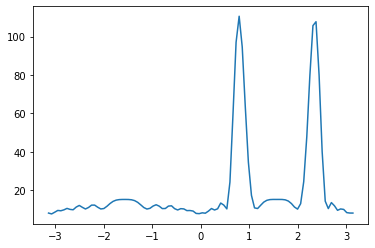

In [174]:
plt.plot(thetas, np.real(beams))

In [175]:
theta0

0.7853981633974483